<a href="https://colab.research.google.com/github/steinruck/WANG-690-FALL-2020/blob/master/Assignment_07/Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 07

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 


In [1]:
# <1> 
# Import libraries

import matplotlib.pyplot as plt
import os
import fnmatch
import pandas as pd
import glob


In [2]:
# <2> 
# Display the current workin directory using os.getcwd()

os.getcwd()

'/content'

In [4]:
# unzip CollegeScorecard_Raw_Data
!unzip /content/CollegeScorecard_Raw_Data.zip

Archive:  /content/CollegeScorecard_Raw_Data.zip
   creating: CollegeScorecard_Raw_Data/
  inflating: CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv  
  inflating: CollegeScorecard_Raw_Data/.DS_Store  
  inflating: CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv  
  inflating: CollegeScorecard_Raw_Data/FieldOfStudyData1516_1617_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2018_19_PP.csv  
  inflating: CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv  
  inflating: CollegeScorecard_Raw_Data/Crosswalks.zip  
  inflating: CollegeScorecard_Raw_Data/MERGED200

In [5]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.

os.listdir('/content/CollegeScorecard_Raw_Data/')

['MERGED1998_99_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2009_10_PP.csv',
 'FieldOfStudyData1415_1516_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED1999_00_PP.csv',
 '.DS_Store',
 'MERGED2004_05_PP.csv',
 'MERGED2008_09_PP.csv',
 'Crosswalks.zip',
 'MERGED2010_11_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2011_12_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2015_16_PP.csv',
 'data.yaml']

In [6]:
# <4> 
# write code to remove the unwanted files from the list variable 
# Note: don't remove/delete these files from the folder in your drive

file_list = glob.glob('/content/CollegeScorecard_Raw_Data/MERGED*')

In [7]:
file_list

['/content/CollegeScorecard_Raw_Data/MERGED1998_99_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2007_08_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2001_02_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2002_03_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2018_19_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2000_01_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2004_05_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2008_09_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv',
 '/content/CollegeScorecard_Raw_Data/MER

In [8]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.

df = []
for f in file_list:
    YEAR = f.split('/')[3].split('MERGED')[1].split('_')[0]
    df.append(pd.read_csv(f, usecols=["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]).assign(YEAR=YEAR))
dfs = pd.concat(df, ignore_index=True)    

dfs = dfs.astype({"YEAR": int})


In [9]:
# <6> 
# explore the new dataframe

# 7 columns, 163331 rows
dfs.shape


(163331, 7)

In [10]:
# general info 
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163331 entries, 0 to 163330
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  float64
 4   ADM_RATE       44911 non-null   float64
 5   TUITIONFEE_IN  79194 non-null   float64
 6   YEAR           163331 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 8.7+ MB


In [11]:
# stats
dfs.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
count,1.633310e+05,163330.000000,44911.000000,79194.000000,163331.000000
mean,9.432395e+05,4.554693,0.692946,11665.505367,2007.249481
std,4.571721e+06,2.189217,0.217062,9985.998016,6.608266
min,1.006360e+05,0.000000,0.000000,0.000000,1996.000000
25%,1.633380e+05,3.000000,0.555000,3776.000000,2002.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000,2008.000000
75%,4.075680e+05,6.000000,0.857100,16146.000000,2013.000000
max,4.914640e+07,9.000000,1.000000,74787.000000,2018.000000


In [12]:
# first 5
dfs.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100654,Alabama A & M University,AL,5.0,NaN,NaN,1998
1,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1998
2,100690,Amridge University,AL,5.0,NaN,NaN,1998
3,100706,University of Alabama in Huntsville,AL,5.0,NaN,NaN,1998
4,100724,Alabama State University,AL,5.0,NaN,NaN,1998


In [13]:
# last 5
dfs.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
163326,48154401,National Personal Training Institute of Cleveland,OH,3.0,NaN,NaN,2015
163327,48387801,Bay Area Medical Academy - San Jose Satellite ...,CA,8.0,NaN,NaN,2015
163328,48400201,High Desert Medical College - Bakerfield,CA,8.0,NaN,31107.0,2015
163329,48414501,Vantage College-San Antonio,TX,6.0,NaN,NaN,2015
163330,48621101,American Institute of Pharmaceutical Technolog...,NJ,2.0,NaN,NaN,2015


In [14]:
dfs.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,False,False,False,False,True,True,False
1,False,False,False,False,True,True,False
2,False,False,False,False,True,True,False
3,False,False,False,False,True,True,False
4,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...
163326,False,False,False,False,True,True,False
163327,False,False,False,False,True,True,False
163328,False,False,False,False,True,False,False
163329,False,False,False,False,True,True,False


In [15]:
dfs.isna().sum()

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118420
TUITIONFEE_IN     84137
YEAR                  0
dtype: int64

In [16]:
# variables
dfs.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'YEAR'],
      dtype='object')

In [17]:
# sample
dfs.sample(20)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
897,133669,Florida Atlantic University,FL,5.0,NaN,NaN,1998
158685,207865,Southwestern Oklahoma State University,OK,6.0,0.9155,6090.0,2015
114180,198677,Heritage Bible College,NC,5.0,NaN,7968.0,2014
159503,232265,Hampton University,VA,5.0,0.6905,23112.0,2015
81766,240055,University of Wisconsin Colleges,WI,3.0,NaN,2469.0,2000
99280,180814,Bellevue University,NE,4.0,NaN,6030.0,2008
44297,180416,Montana Technological University,MT,7.0,0.9611,3404.0,2001
160790,436261,Southwest Acupuncture College-Boulder,CO,7.0,NaN,NaN,2015
96656,444158,Colorado Technical University-Online,CO,7.0,NaN,14190.0,2004
29287,171225,Monroe County Community College,MI,3.0,NaN,2240.0,2009


In [18]:
# <7>

# look at just UMBC but assign to new df
UMBC = dfs[dfs['INSTNM'].str.contains("University of Maryland-Baltimore County")]
UMBC


,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
8501,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
15432,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007
22497,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
29042,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
36024,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
43667,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
49955,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
57482,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
63870,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013


In [20]:
# sort table by YEAR column
UMBC = UMBC.sort_values(by=['YEAR'])
UMBC

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
150809,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
136874,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
85525,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
78842,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
43667,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
57482,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
22497,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
92009,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
143578,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [21]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

# 7 columns, 23 rows
UMBC.shape

(23, 7)

In [22]:
# variables
UMBC.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'YEAR'],
      dtype='object')

In [ ]:
# first 5 years
UMBC.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
150809,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
136874,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
85525,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
78842,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [ ]:
# last 5 years
UMBC.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
113061,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
157220,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
36024,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
49955,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
71525,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [23]:
# random sample of 10
UMBC.sample(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
120911,163268,University of Maryland-Baltimore County,MD,2.0,0.6081,9467.0,2011
49955,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
105691,163268,University of Maryland-Baltimore County,MD,2.0,0.6589,9171.0,2010
85525,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
98693,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008
113061,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
128623,163268,University of Maryland-Baltimore County,MD,2.0,0.6035,9764.0,2012
150809,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
63870,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013


In [ ]:
# checking for null values
UMBC.isnull()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
150809,False,False,False,False,True,True,False
136874,False,False,False,False,True,True,False
1982,False,False,False,False,True,True,False
85525,False,False,False,False,True,True,False
78842,False,False,False,False,True,False,False
43667,False,False,False,False,False,False,False
57482,False,False,False,False,False,False,False
22497,False,False,False,False,False,False,False
92009,False,False,False,False,False,False,False
143578,False,False,False,False,False,False,False


In [ ]:
UMBC.isna().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [24]:
UMBC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 150809 to 71525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   YEAR           23 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.4+ KB


In [25]:
# stats
UMBC.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
count,23.0,23.0,18.000000,19.000000,23.00000
mean,163268.0,2.0,0.640694,9004.842105,2007.00000
std,0.0,0.0,0.052728,1825.795421,6.78233
min,163268.0,2.0,0.568300,5490.000000,1996.00000
25%,163268.0,2.0,0.597600,8270.000000,2001.50000
50%,163268.0,2.0,0.632100,8872.000000,2007.00000
75%,163268.0,2.0,0.689375,10226.000000,2012.50000
max,163268.0,2.0,0.717400,11778.000000,2018.00000


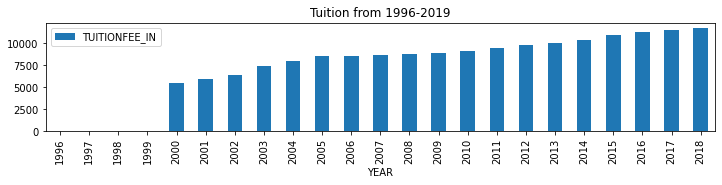

In [30]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

UMBC.plot(kind='bar',x='YEAR',y='TUITIONFEE_IN', title='Tuition from 1996-2019', figsize=(12,2))
plt.title = "Tuition from 1996-2019"




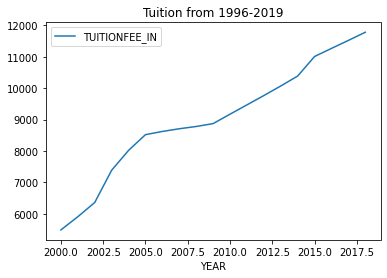

In [32]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart


UMBC.plot(kind='line',x='YEAR',y='TUITIONFEE_IN', title='Tuition from 1996-2019')


In [36]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

TUITIONFEE_list = UMBC['TUITIONFEE_IN'].values.tolist()
print(TUITIONFEE_list)

[nan, nan, nan, nan, 5490.0, 5910.0, 6362.0, 7388.0, 8020.0, 8520.0, 8622.0, 8708.0, 8780.0, 8872.0, 9171.0, 9467.0, 9764.0, 10068.0, 10384.0, 11006.0, 11264.0, 11518.0, 11778.0]


In [35]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

tuition_series = pd.Series(TUITIONFEE_list)
change = tuition_series.pct_change()
print(change)


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5     0.076503
6     0.076481
7     0.161270
8     0.085544
9     0.062344
10    0.011972
11    0.009974
12    0.008268
13    0.010478
14    0.033702
15    0.032276
16    0.031372
17    0.031135
18    0.031387
19    0.059900
20    0.023442
21    0.022550
22    0.022573
dtype: float64


In [38]:
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

rounded = [round(x, 2) for x in change]
rounded

[nan,
 nan,
 nan,
 nan,
 nan,
 0.08,
 0.08,
 0.16,
 0.09,
 0.06,
 0.01,
 0.01,
 0.01,
 0.01,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.06,
 0.02,
 0.02,
 0.02]

In [39]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")

UMBC['PCT_CHANGE'] = rounded
UMBC.head(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
150809,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
136874,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
85525,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
78842,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
43667,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,0.08
57482,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,0.08
22497,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,0.16
92009,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,0.09
143578,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,0.06


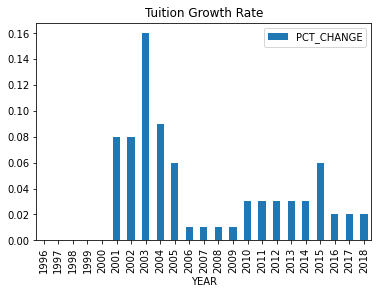

In [40]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

UMBC.plot(kind='bar',x='YEAR',y='PCT_CHANGE', title='Tuition Growth Rate')



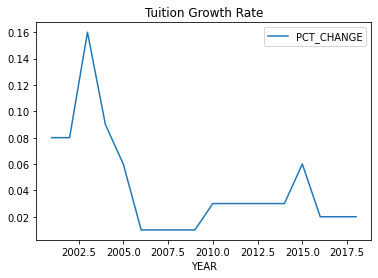

In [41]:


UMBC.plot(kind='line',x='YEAR',y='PCT_CHANGE', title='Tuition Growth Rate')

In [44]:
# <12>
# Let's create a function which can be reused for any college.

# <13>
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 

# misunderstood the instructions so this one creates a function that pulls university and calculates
# the percent change in tuition at the same time
# only need to change the string with the college name in the first line of the function 
# assigns the result of the function to JHU
def pect_change():
    college = dfs[dfs['INSTNM'].str.contains("Johns Hopkins University")]
    college = college.sort_values(by=['YEAR'])
    TUITIONFEE_list = college['TUITIONFEE_IN'].values.tolist()
    tuition_series = pd.Series(TUITIONFEE_list)
    change = tuition_series.pct_change()
    rounded = []
    for i in change:
        rounded.append(round(i, 2))
    college['PCT_CHANGE'] = rounded
    return college
JHU = pect_change()
JHU

 

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
150797,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
136864,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
85516,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
78833,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
43658,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,0.05
57473,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,0.05
22489,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,0.05
92002,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,0.05
143571,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,0.05


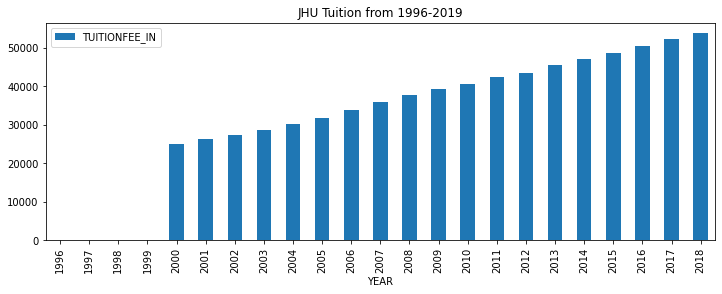

In [46]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 

JHU.plot(kind='bar',x='YEAR',y='TUITIONFEE_IN', title='JHU Tuition from 1996-2019', figsize=(12,4))



In [ ]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

# already calculated in function above



In [ ]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

# already calculated in function above

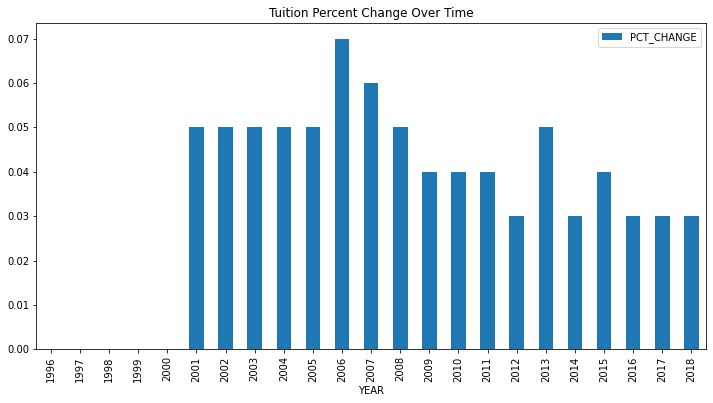

In [47]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

JHU.plot(kind='bar',x='YEAR',y='PCT_CHANGE', title='Tuition Percent Change Over Time', figsize=(12,6))



In [48]:
# <18>
# combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.

umbc0 = UMBC['PCT_CHANGE']
umbc1 = UMBC['YEAR']
umbc2 = pd.concat([umbc1, umbc0], axis=1)

umbc2


,YEAR,PCT_CHANGE
150809,1996,NaN
136874,1997,NaN
1982,1998,NaN
85525,1999,NaN
78842,2000,NaN
43667,2001,0.08
57482,2002,0.08
22497,2003,0.16
92009,2004,0.09
143578,2005,0.06


In [49]:
# change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.

umbc2 = umbc2.rename(columns={'PCT_CHANGE': 'UMBC_PCT'})
umbc2

,YEAR,UMBC_PCT
150809,1996,NaN
136874,1997,NaN
1982,1998,NaN
85525,1999,NaN
78842,2000,NaN
43667,2001,0.08
57482,2002,0.08
22497,2003,0.16
92009,2004,0.09
143578,2005,0.06


In [51]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.

JHU0 = JHU['PCT_CHANGE']
JHU1 = JHU['YEAR']
JHU2 = pd.concat([JHU1, JHU0], axis=1)

JHU2



,YEAR,PCT_CHANGE
150797,1996,NaN
136864,1997,NaN
1973,1998,NaN
85516,1999,NaN
78833,2000,NaN
43658,2001,0.05
57473,2002,0.05
22489,2003,0.05
92002,2004,0.05
143571,2005,0.05


In [52]:
# change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

JHU2 = JHU2.rename(columns={'PCT_CHANGE': 'JHU_PCT'})
JHU2

,YEAR,JHU_PCT
150797,1996,NaN
136864,1997,NaN
1973,1998,NaN
85516,1999,NaN
78833,2000,NaN
43658,2001,0.05
57473,2002,0.05
22489,2003,0.05
92002,2004,0.05
143571,2005,0.05


In [53]:
# Now, merger the two data frames
# and display the new dataframe

result = pd.merge(umbc2, JHU2, on="YEAR")

result

,YEAR,UMBC_PCT,JHU_PCT
0,1996,NaN,NaN
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN
5,2001,0.08,0.05
6,2002,0.08,0.05
7,2003,0.16,0.05
8,2004,0.09,0.05
9,2005,0.06,0.05


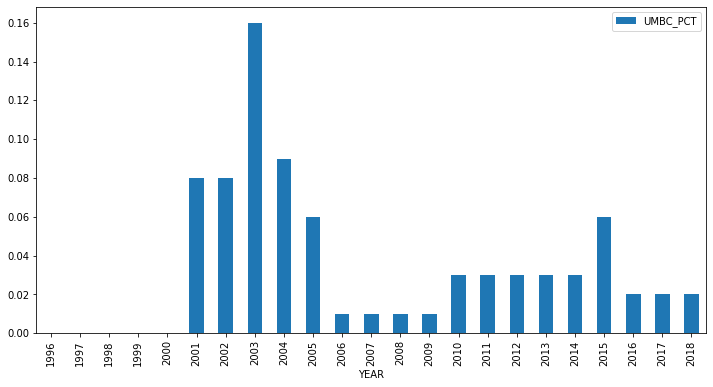

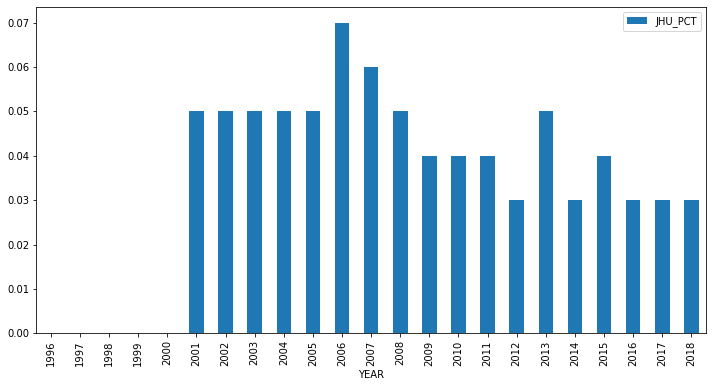

In [ ]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

result.plot(kind='bar',x='YEAR',y='UMBC_PCT', figsize=(12,6))
result.plot(kind='bar',x='YEAR',y='JHU_PCT', figsize=(12,6))


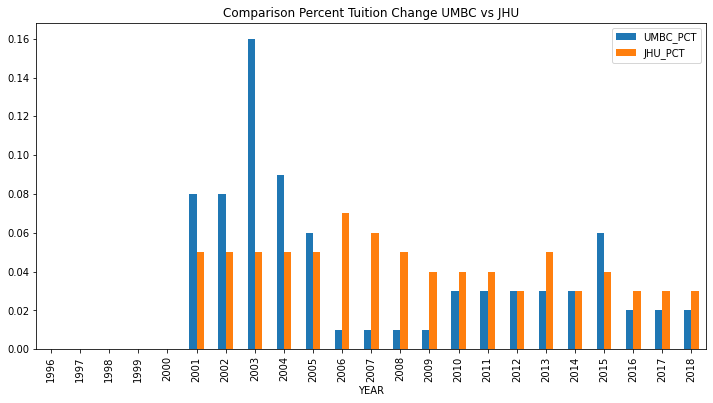

In [54]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

result.plot(kind='bar',x='YEAR',y=['UMBC_PCT', 'JHU_PCT'], title='Comparison Percent Tuition Change UMBC vs JHU', figsize=(12,6))



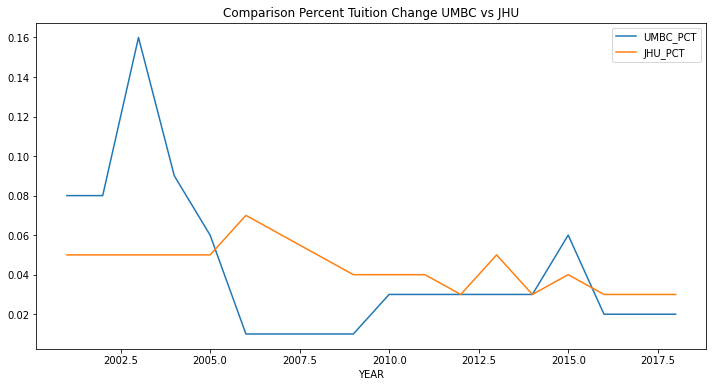

In [55]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

result.plot(kind='line',x='YEAR',y=['UMBC_PCT', 'JHU_PCT'], title='Comparison Percent Tuition Change UMBC vs JHU', figsize=(12,6))



In [ ]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### Based on my observation of the plots
- UMBC experienced a spike in tuition change in 2003 and then a much smaller increase.
- It held a steady percent increase from 2006-2009 and again from 2010-2014.
- A larger tuition increase occured in 2015 before the percent increase again leveled out from 2016-2019
- JHU has a more steady percent increase but overall higher percentage increase compared to UMBC

In [ ]:
# The end.